In [171]:
# Content
# Citation
# Please cite the following if you are interested in using the dataset :
# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019


# Import packages

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection

In [173]:
df = pd.read_csv("Admission_Predict.csv")
df.shape

(400, 9)

In [19]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Drop unwanted columns

In [174]:
df.drop('Serial No.', axis=1, inplace=True)

# Data Exploration and Analysis

In [175]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [177]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Check the dataset for missing data

In [178]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Check for duplicates

In [179]:
df.duplicated(subset=None).sum()

0

No duplicates found.

## Heatmap of correlation coefficients

Text(0.5, 1.0, 'Heat Map of correlation among Factors')

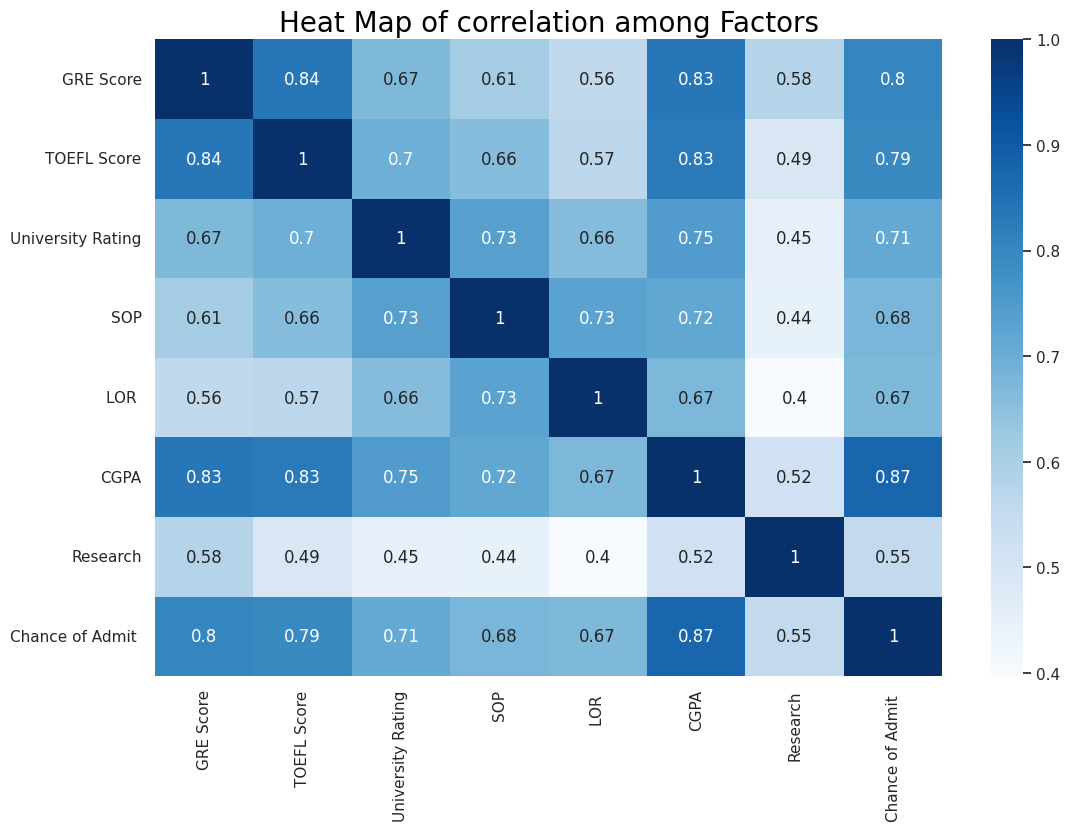

In [180]:
sns.heatmap(df.corr(), annot=True, cmap= 'Blues').set_title('Heat Map of correlation among Factors', color='black', size='20')

Some typo errors

In [181]:
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

## Probability distribution of Admit to Program

<Axes: xlabel='Chance of Admit', ylabel='Density'>

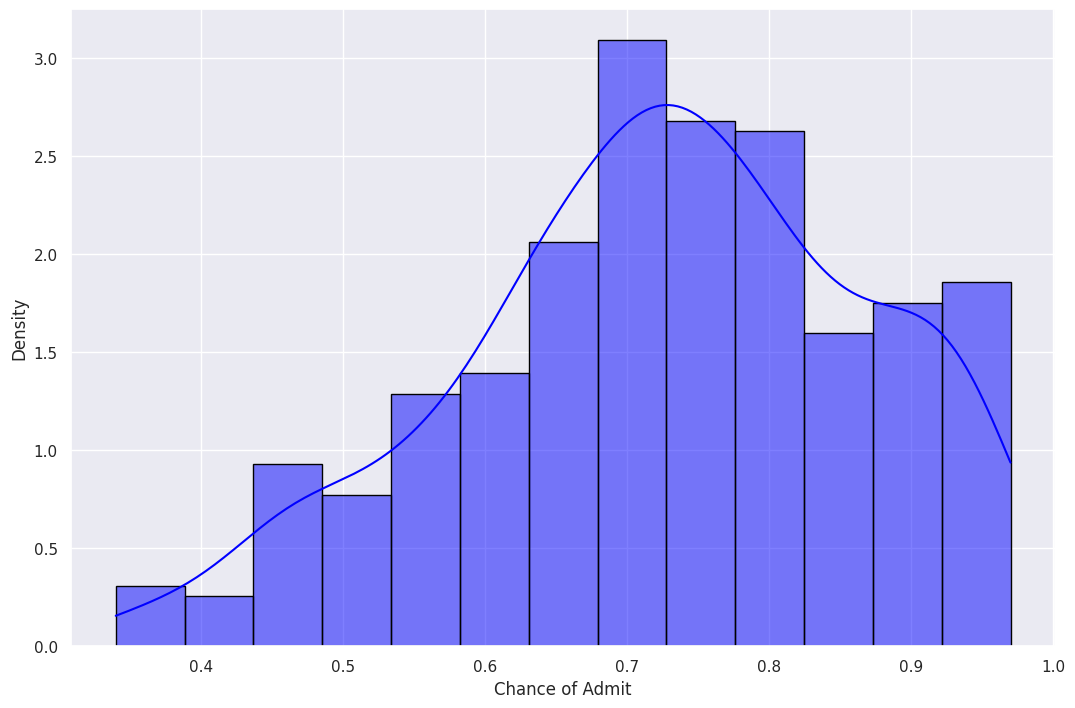

In [182]:
sns.histplot(df['Chance of Admit'], kde=True, stat='density', color='Blue', edgecolor='black')

## Correlation coefficients of 'Chance of Admit' with other features. The objective is to gauge which features have influence on 'Chance of Admit'.



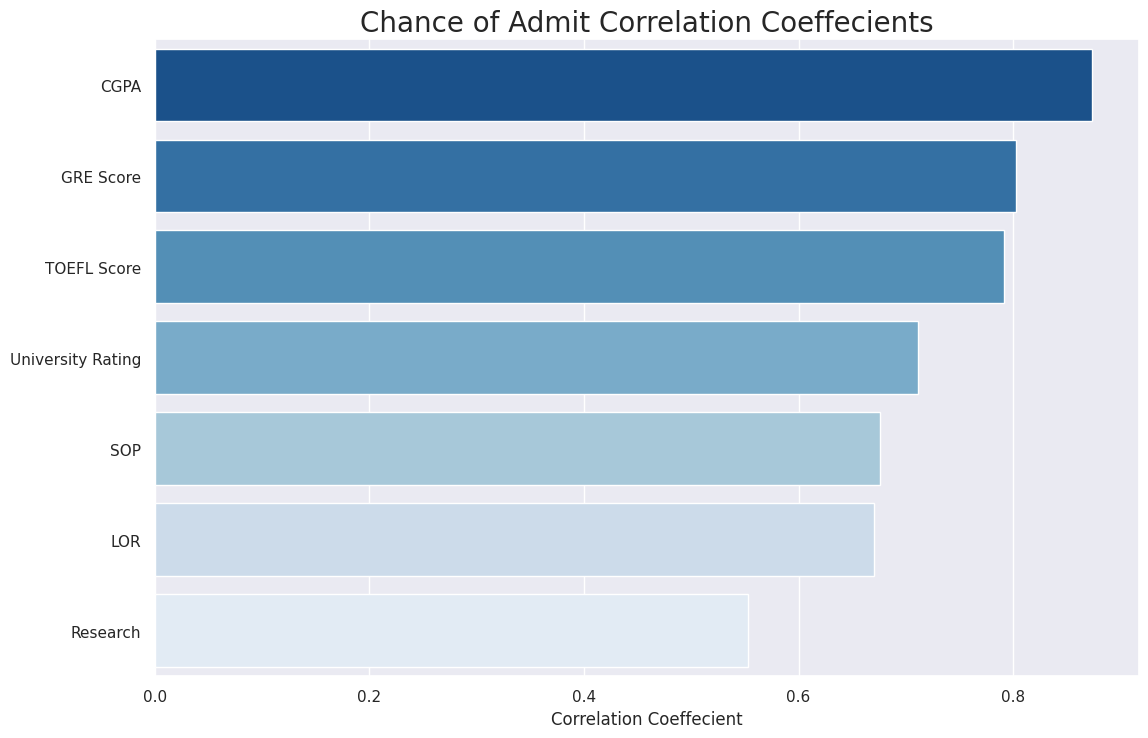

In [183]:
admit_corr = pd.DataFrame(df.corr()['Chance of Admit'])[:-1]
admit_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
admit_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
admit_corr_x = admit_corr.index
admit_corr_y = admit_corr['Correlation Coeffecient']
sns.barplot(y=admit_corr_x,x=admit_corr_y,palette=("Blues_r")).set_title('Chance of Admit Correlation Coeffecients', size='20')
# sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.show()

##Visualize the correlation

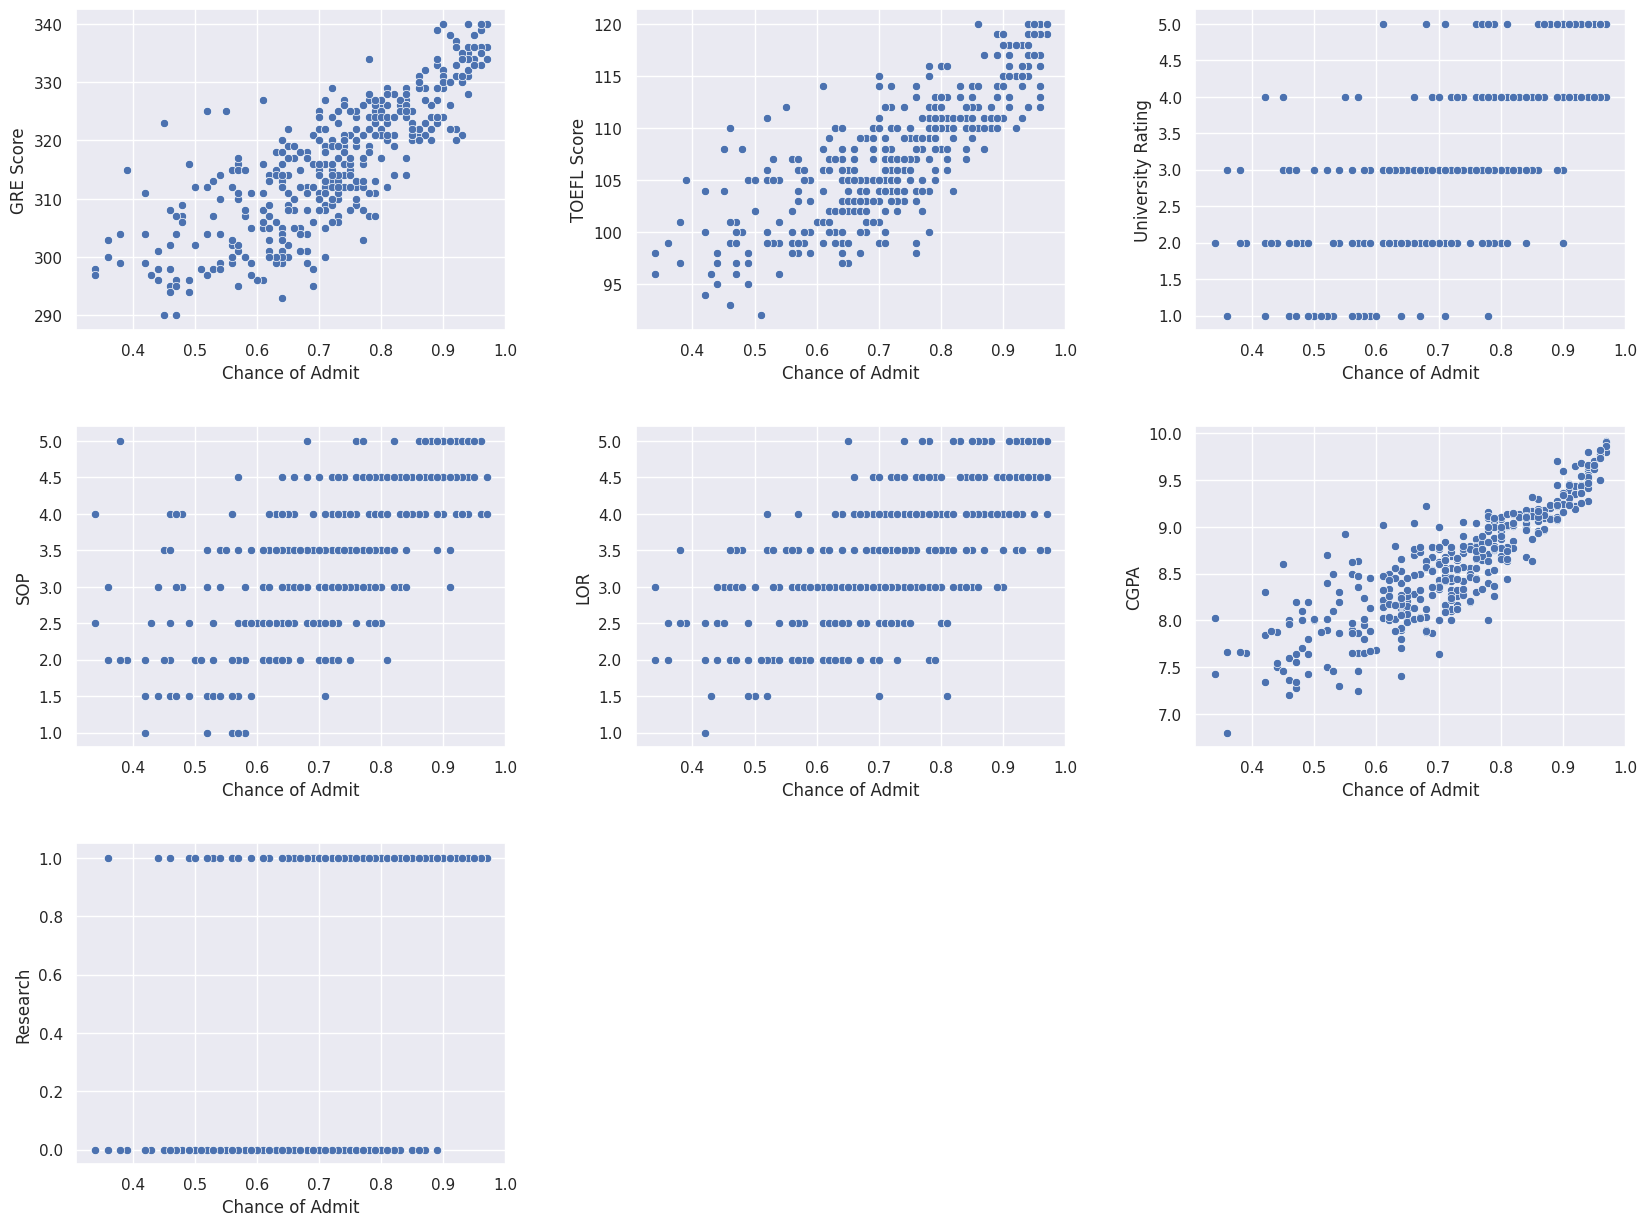

In [184]:
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    sns.scatterplot(x=df['Chance of Admit'], y= df.iloc[:,i])
    plt.xlabel('Chance of Admit')
    plt.ylabel(df.columns[i])

**CGPA, GRE** Score and **TOEFL** Score are the top predictors of probability of admission. 

## Remove outliers

In [185]:
for i in df.columns:
    # Calculate I and III quartile
    first_quartile = df[i].describe()['25%']
    third_quartile = df[i].describe()['75%']

    # Interquartile range
    iqr = third_quartile - first_quartile

    # Remove outliers
    df = df[(df[i] > (first_quartile - 3 * iqr)) & (df[i] < (third_quartile + 3 * iqr))]

In [186]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Prediction Models

## Separate features and target

In [187]:

features = df[['CGPA','GRE Score', 'TOEFL Score']]
target = df['Chance of Admit']

Split training and test data

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


## Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Models

## Linear Regression

In [190]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
print("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print("Test dataset: {0}{1}" .format(X_test.shape, y_test.shape))

Train dataset: (320, 3)(320,)
Test dataset: (80, 3)(80,)


In [191]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8132692767737578

In [192]:
model.intercept_, model.coef_[0]

(0.7233124999999999, 0.08385354841718531)

In [193]:
y_pred = model.predict(X_test)

In [194]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('R2 score: ', r2)


Mean Absolute Error: 0.060116751487631556
Mean Squared Error: 0.0070089782536746584
Root Mean Squared Error: 0.08371964078801734
R2 score:  0.6846744158237041


## Random Forest Regressor

In [195]:
from sklearn.ensemble import RandomForestRegressor
list_rfr = []
for n in range(10,101):
  RFR = RandomForestRegressor(n_estimators=n, random_state=0)
  RFR.fit(X_train, y_train)
  y_pred = RFR.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  r2 = r2_score(y_test, y_pred)
  list_rfr.append([n, rmse,r2 ])

min_row = min(list_rfr, key=lambda x: x[1])
print(min_row)

max_row = max(list_rfr, key=lambda x: x[2])
print(max_row)


[17, 0.08913283698928125, 0.6425790901122344]
[17, 0.08913283698928125, 0.6425790901122344]


In [196]:
RFR = RandomForestRegressor(n_estimators=17, random_state=0)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.06076470588235293
Mean Squared Error: 0.007944662629757782
Root Mean Squared Error: 0.08913283698928125
R2 score:  0.6425790901122344


In [197]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print('R2 score: ', r2)

Mean Absolute Error: 0.06076470588235293
Mean Squared Error: 0.007944662629757782
Root Mean Squared Error: 0.08913283698928125
R2 score:  0.6425790901122344


Train different models for the given data and calculate the r2 values

In [198]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


In [207]:
models = [['DecisionTree :',DecisionTreeRegressor(max_depth=17)],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor(n_estimators=17)],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()]]

In [223]:
cols = ['model_name', 'r2']
lst = []
for name,model in models:  
  model = model
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  lst.append([name,float(r2_score(y_test, predictions).round(3)) ])

df_models = pd.DataFrame(lst, columns=cols)
df_models.sort_values(by=['r2'], ascending=False)

,model_name,r2
1,Linear Regression :,0.685
4,GradientBoostingClassifier:,0.646
2,RandomForest :,0.616
5,Xgboost:,0.609
3,KNeighbours :,0.605
0,DecisionTree :,0.558


So the best predictor model among the ones tested is **Regression analysis **with R2 of 0.685